In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [6]:
asia_zoo = pd.read_csv('./data/AsiaZoo.txt',header=None)
asia_zoo.columns = ['国家','2006世界杯','2010世界杯','2007亚洲杯']

In [7]:
asia_zoo

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [10]:
train = asia_zoo.values[:,1:]

In [12]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train)
y_

array([1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [19]:
# 把不同组的队伍分成3行打印
for i in range(3):
    cuntrys = asia_zoo[y_ == i]['国家'].values
    for cuntry in cuntrys:
        print(cuntry,end=',')
    print()

伊朗,沙特,乌兹别克斯坦,巴林,朝鲜,
中国,伊拉克,卡塔尔,阿联酋,泰国,越南,阿曼,印尼,
日本,韩国,


Text(0.5,0,'2007-asia-cup')

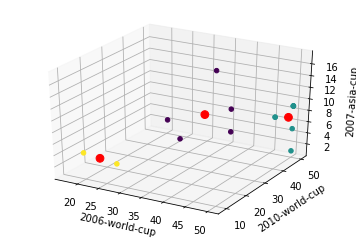

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

cluster_centers = kmean.cluster_centers_

axes = plt.subplot(projection='3d')
axes.scatter3D(train[:,0],train[:,1],train[:,2],alpha=1,c=y_)
axes.scatter3D(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
               c='red',alpha=1,s=60)
axes.set_xlabel('2006-world-cup')
axes.set_ylabel('2010-world-cup')
axes.set_zlabel('2007-asia-cup')